# Unemployment Data Analysis With Python
## Created And Done By "shaik salma"

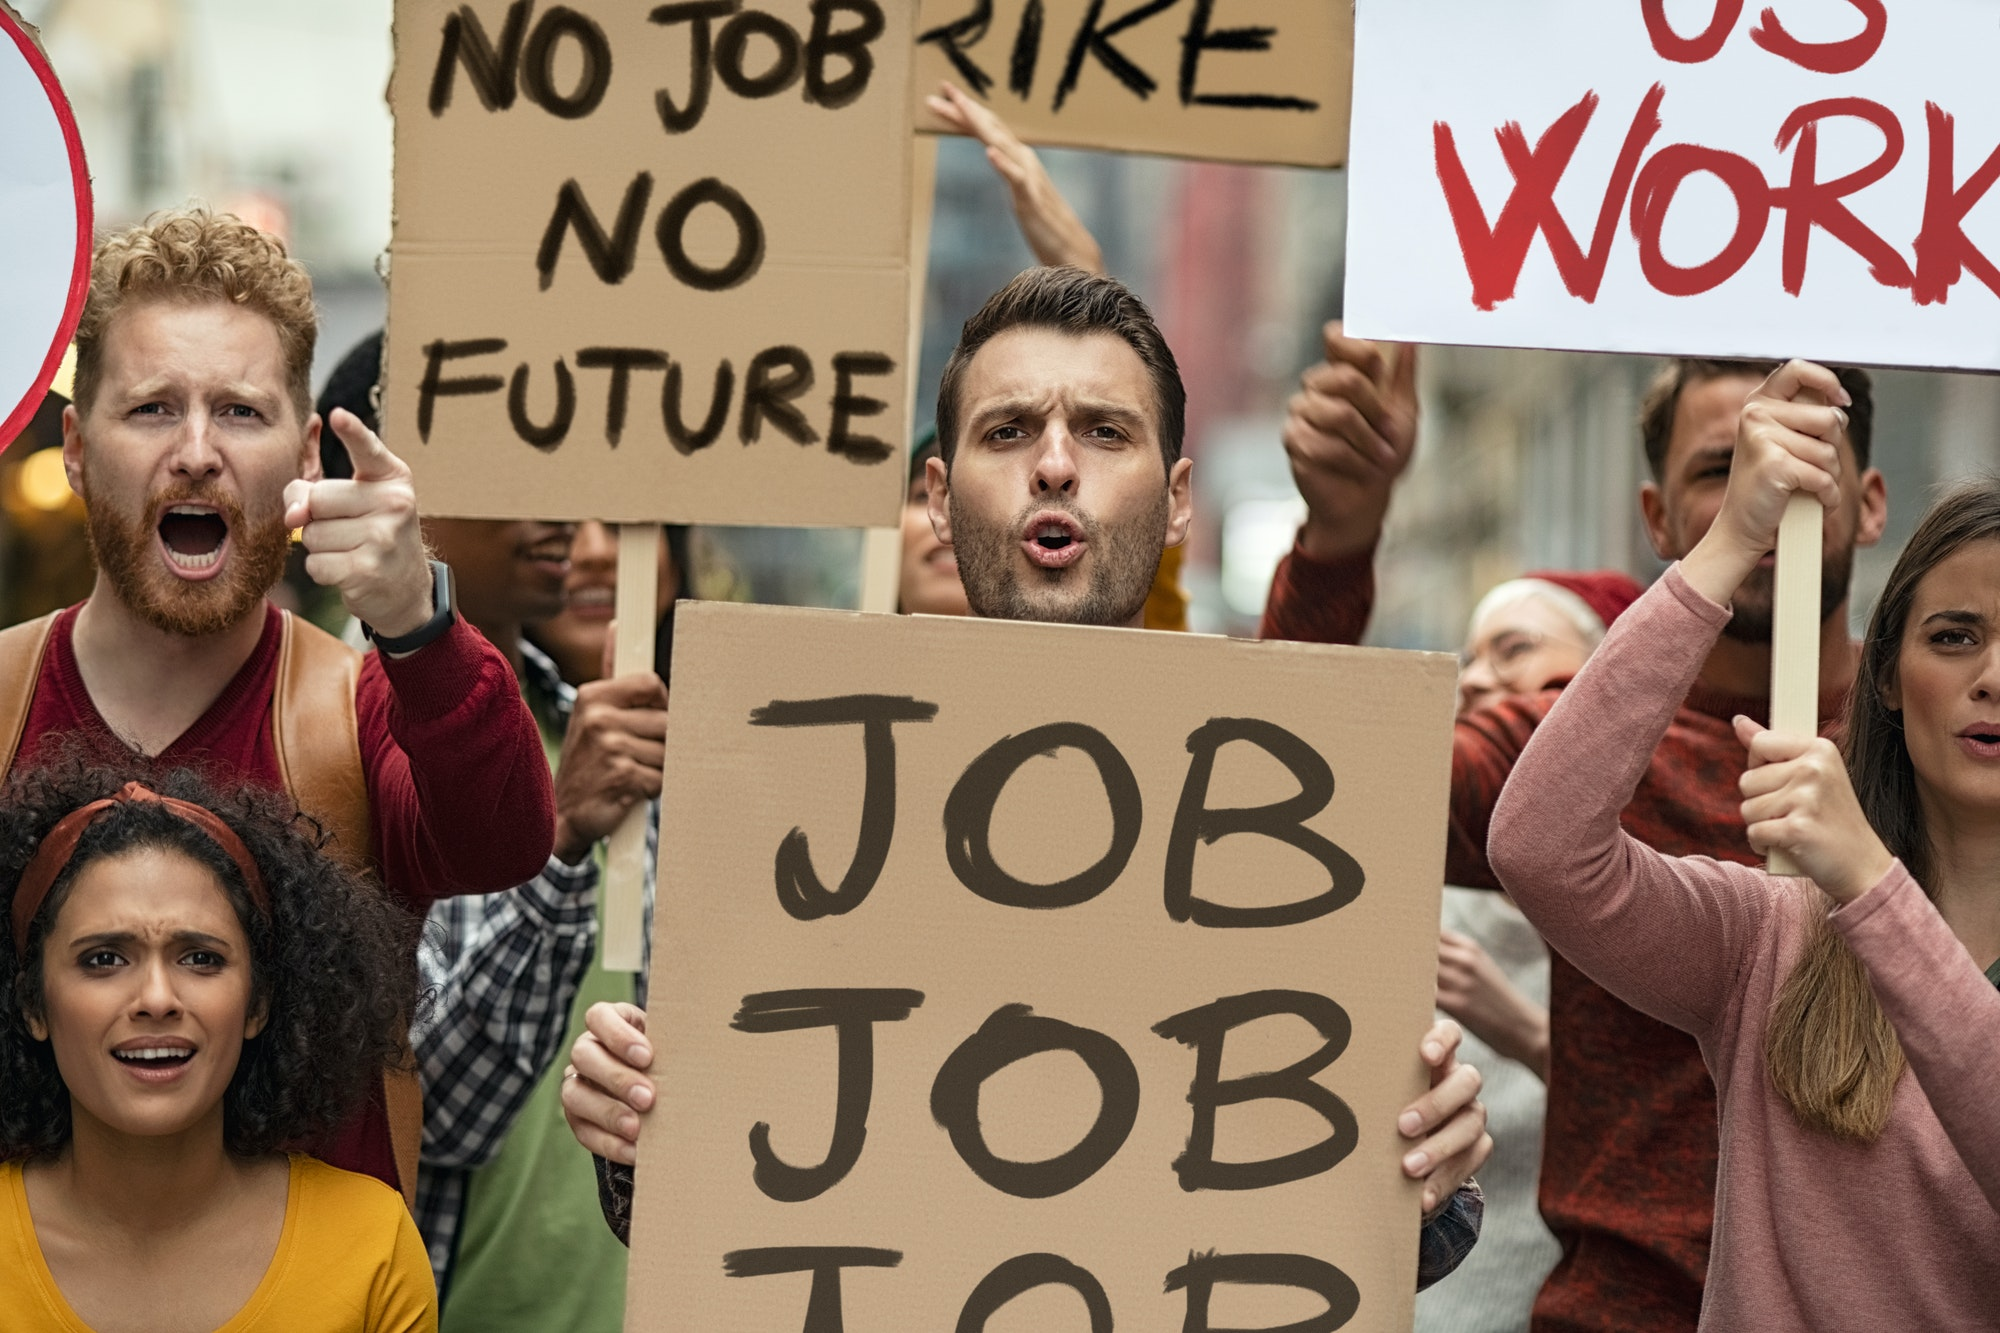

In [1]:
import IPython.display as dsp
dsp.Image('https://cdn.siasat.com/wp-content/uploads/2020/07/unemployment-strike-and-protest.jpg',width=800,height=500)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv('/kaggle/input/unemployment-in-india/Unemployment in India.csv')

In [4]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(768, 7)

In [7]:
df.size

5376

In [8]:
df.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(740, 7)

In [11]:
df.size

5180

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [13]:
df.describe(include='all')

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
count,740,740,740,740.000000,7.400000e+02,740.000000,740
unique,28,14,2,NaN,NaN,NaN,2
top,Andhra Pradesh,31-10-2019,Monthly,NaN,NaN,NaN,Urban
freq,28,55,381,NaN,NaN,NaN,381
mean,NaN,NaN,NaN,11.787946,7.204460e+06,42.630122,NaN
std,NaN,NaN,NaN,10.721298,8.087988e+06,8.111094,NaN
min,NaN,NaN,NaN,0.000000,4.942000e+04,13.330000,NaN
25%,NaN,NaN,NaN,4.657500,1.190404e+06,38.062500,NaN
50%,NaN,NaN,NaN,8.350000,4.744178e+06,41.160000,NaN
75%,NaN,NaN,NaN,15.887500,1.127549e+07,45.505000,NaN


In [14]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [15]:
df.columns=df.columns.str.strip()

In [16]:
df.columns=df.columns.str.replace(' ','_')

In [17]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated_Unemployment_Rate_(%)',
       'Estimated_Employed', 'Estimated_Labour_Participation_Rate_(%)',
       'Area'],
      dtype='object')

In [18]:
df['Date']=pd.to_datetime(df['Date'])

In [19]:
df['Region'].value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64

In [20]:
px.bar(df,x=df['Region'].value_counts().keys(),y=df['Region'].value_counts(),color=df['Region'].value_counts().keys(),title='Region Counts')

In [21]:
px.pie(df,names=df['Region'].value_counts().keys(),values=df['Region'].value_counts(),color=df['Region'].value_counts().keys(),title='Region %age')

In [22]:
df['Area'].value_counts()

Urban    381
Rural    359
Name: Area, dtype: int64

In [23]:
px.bar(df,x=df['Area'].value_counts().keys(),y=df['Area'].value_counts(),color=df['Area'].value_counts().keys(),title='Area Counts')

In [24]:
px.pie(df,names=df['Area'].value_counts().keys(),values=df['Area'].value_counts(),color=df['Area'].value_counts().keys(),title='Area %age')

In [25]:
import datetime as dt

In [26]:
df['Month']=df['Date'].dt.month_name()

In [27]:
df['Year']=df['Date'].dt.year

In [28]:
df.drop(['Frequency'],axis=1,inplace=True)

In [29]:
df.head()

,Region,Date,Estimated_Unemployment_Rate_(%),Estimated_Employed,Estimated_Labour_Participation_Rate_(%),Area,Month,Year
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,May,2019
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,June,2019
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,July,2019
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,August,2019
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,September,2019


In [30]:
df['Year'].value_counts(normalize=True)*100

2019    58.108108
2020    41.891892
Name: Year, dtype: float64

In [31]:
df['Month'].value_counts()

May          105
June         104
October       55
November      55
July          54
August        53
December      53
January       53
February      53
September     52
March         52
April         51
Name: Month, dtype: int64

In [32]:
px.bar(df,x=df['Month'].value_counts().keys(),y=df['Month'].value_counts(),color=df['Month'].value_counts().keys(),title='Month Counts')

In [33]:
px.pie(df,names=df['Month'].value_counts().keys(),values=df['Month'].value_counts(),color=df['Month'].value_counts().keys(),title='Month %age')

In [34]:
df_region_rate=df.groupby(['Region','Year']).agg({"Estimated_Unemployment_Rate_(%)":'mean'}).reset_index()
df_region_rate.sort_values(by='Estimated_Unemployment_Rate_(%)',ascending=False)

,Region,Year,Estimated_Unemployment_Rate_(%)
17,Haryana,2020,30.929167
23,Jharkhand,2020,29.053333
48,Tripura,2019,28.363125
49,Tripura,2020,28.333333
5,Bihar,2020,25.632500
37,Puducherry,2020,23.840000
16,Haryana,2019,22.798750
11,Delhi,2020,20.155000
18,Himachal Pradesh,2019,19.064375
19,Himachal Pradesh,2020,17.841667


<Axes: title={'center': 'Average Unemployment Rate In All Regions In Year(2019-2020)'}, xlabel='Estimated_Unemployment_Rate_(%)', ylabel='Region'>

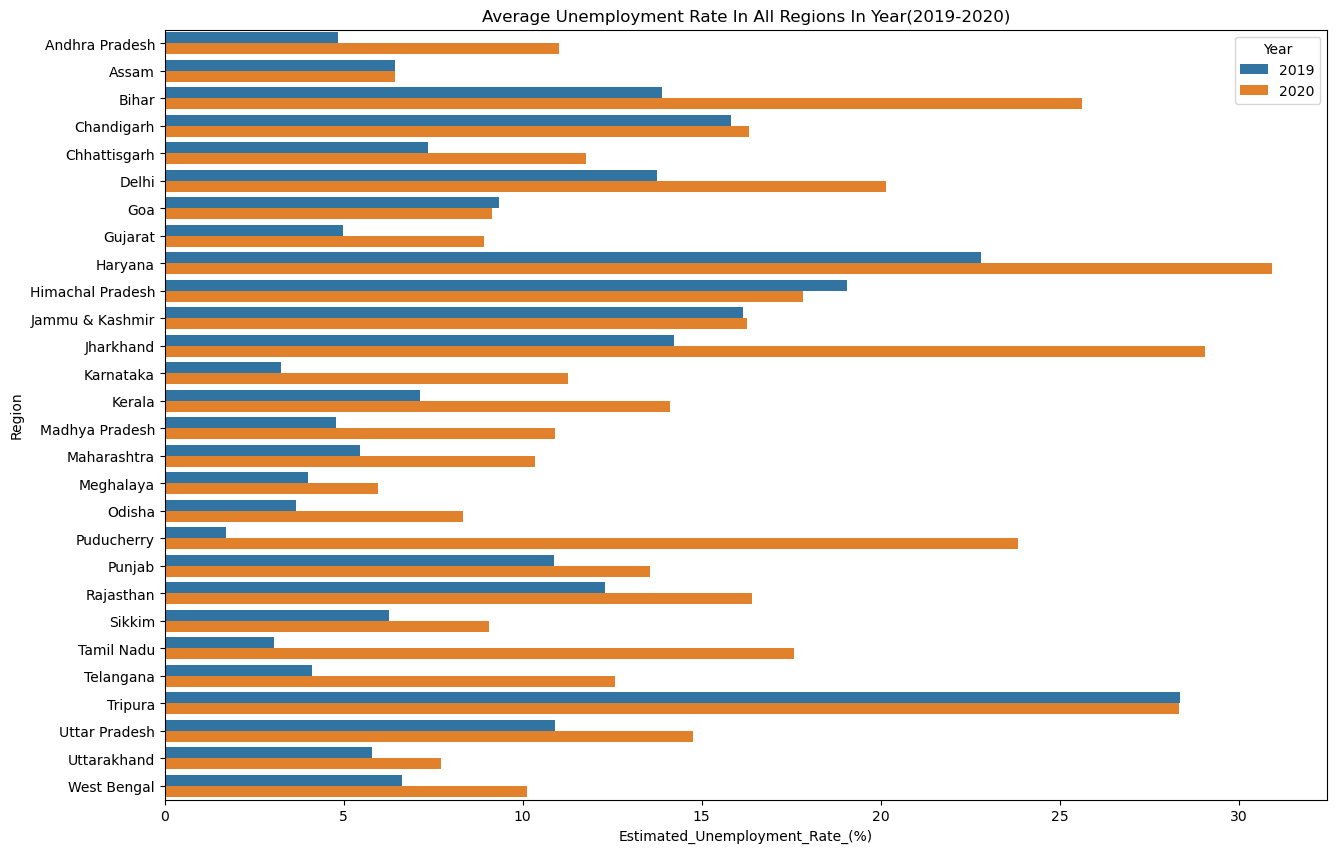

In [35]:
plt.figure(figsize=(15,10))
plt.title("Average Unemployment Rate In All Regions In Year(2019-2020)")
sns.barplot(data=df_region_rate,y='Region',x='Estimated_Unemployment_Rate_(%)',hue='Year')

In [36]:
df.head()

,Region,Date,Estimated_Unemployment_Rate_(%),Estimated_Employed,Estimated_Labour_Participation_Rate_(%),Area,Month,Year
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,May,2019
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,June,2019
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,July,2019
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,August,2019
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,September,2019


In [37]:
df_region_emp=df.groupby(['Region','Year']).agg({"Estimated_Employed":'mean'}).reset_index()
df_region_emp.sort_values(by='Estimated_Employed',ascending=False)

,Region,Year,Estimated_Employed
50,Uttar Pradesh,2019,2.852497e+07
51,Uttar Pradesh,2020,2.752132e+07
30,Maharashtra,2019,2.101646e+07
31,Maharashtra,2020,1.862185e+07
54,West Bengal,2019,1.795374e+07
55,West Bengal,2020,1.619160e+07
44,Tamil Nadu,2019,1.394580e+07
4,Bihar,2019,1.323785e+07
14,Gujarat,2019,1.190651e+07
28,Madhya Pradesh,2019,1.147777e+07


<Axes: title={'center': 'Average Employment In All Regions In Year(2019-2020)'}, xlabel='Estimated_Employed', ylabel='Region'>

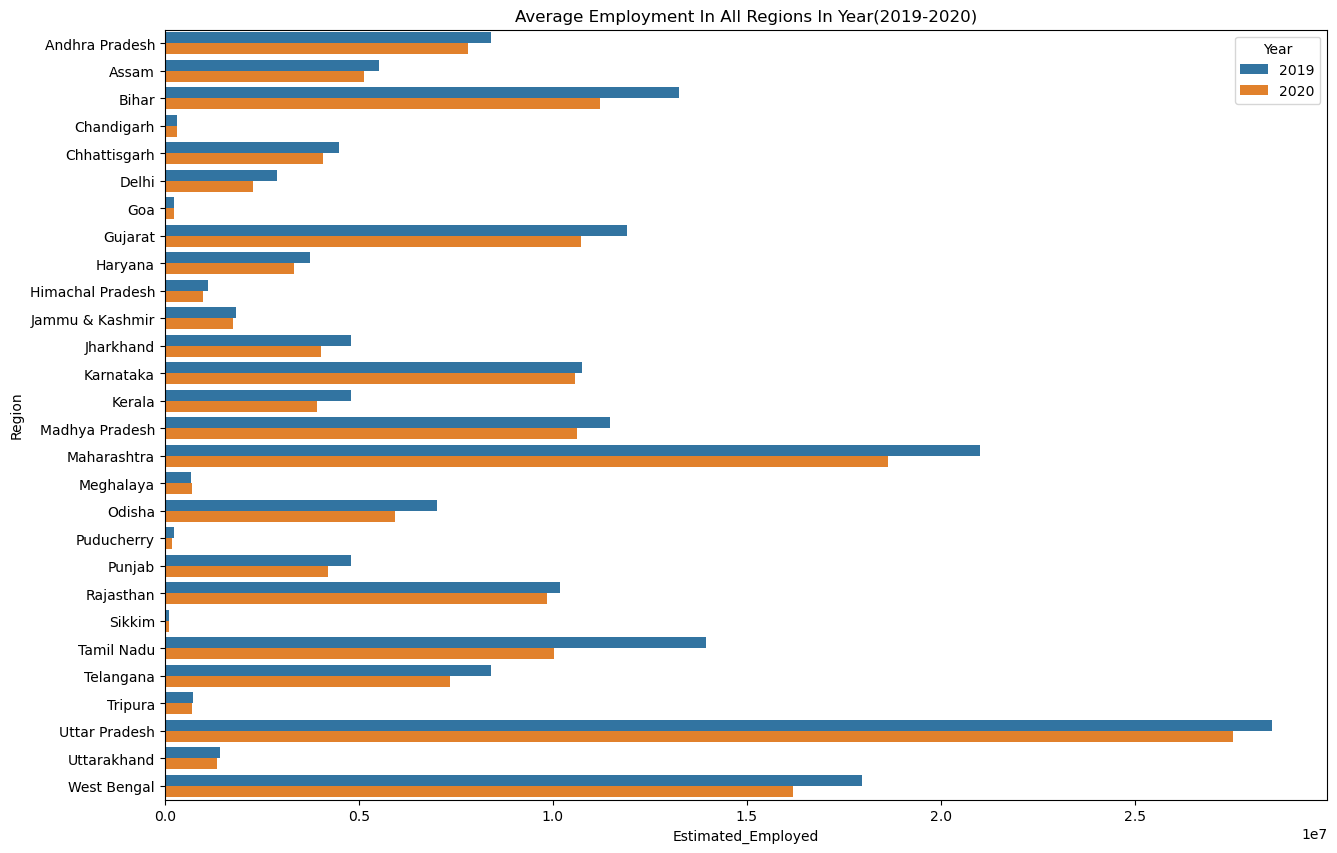

In [38]:
plt.figure(figsize=(15,10))
plt.title("Average Employment In All Regions In Year(2019-2020)")
sns.barplot(data=df_region_emp,y='Region',x='Estimated_Employed',hue='Year')

In [39]:
df_region_area=df.groupby(['Area','Year']).agg({"Estimated_Unemployment_Rate_(%)":'mean'}).reset_index()
df_region_area.sort_values(by='Estimated_Unemployment_Rate_(%)',ascending=False)

,Area,Year,Estimated_Unemployment_Rate_(%)
3,Urban,2020,16.654528
1,Rural,2020,13.466358
2,Urban,2019,10.668514
0,Rural,2019,8.044135


<Axes: title={'center': 'Average Unmployment Rate In All Areas In Year(2019-2020)'}, xlabel='Estimated_Unemployment_Rate_(%)', ylabel='Area'>

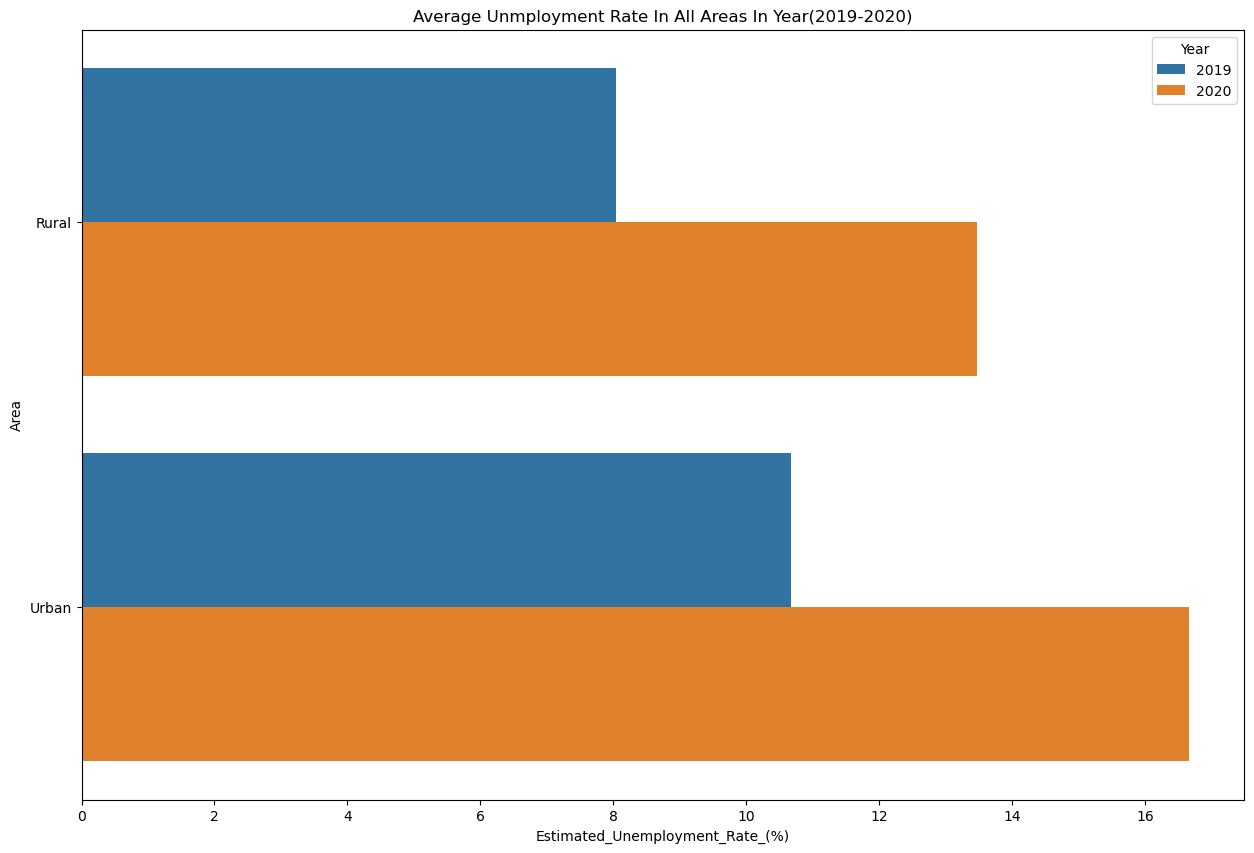

In [40]:
plt.figure(figsize=(15,10))
plt.title("Average Unmployment Rate In All Areas In Year(2019-2020)")
sns.barplot(data=df_region_area,y='Area',x='Estimated_Unemployment_Rate_(%)',hue='Year')

In [41]:
df_region_ar_em=df.groupby(['Area','Year']).agg({"Estimated_Employed":'mean'}).reset_index()
df_region_ar_em.sort_values(by='Estimated_Employed',ascending=False)

,Area,Year,Estimated_Employed
0,Rural,2019,1.049050e+07
1,Rural,2020,9.782849e+06
2,Urban,2019,4.548901e+06
3,Urban,2020,4.164845e+06


<Axes: title={'center': 'Average Employment In All Areas In Year(2019-2020)'}, xlabel='Estimated_Employed', ylabel='Area'>

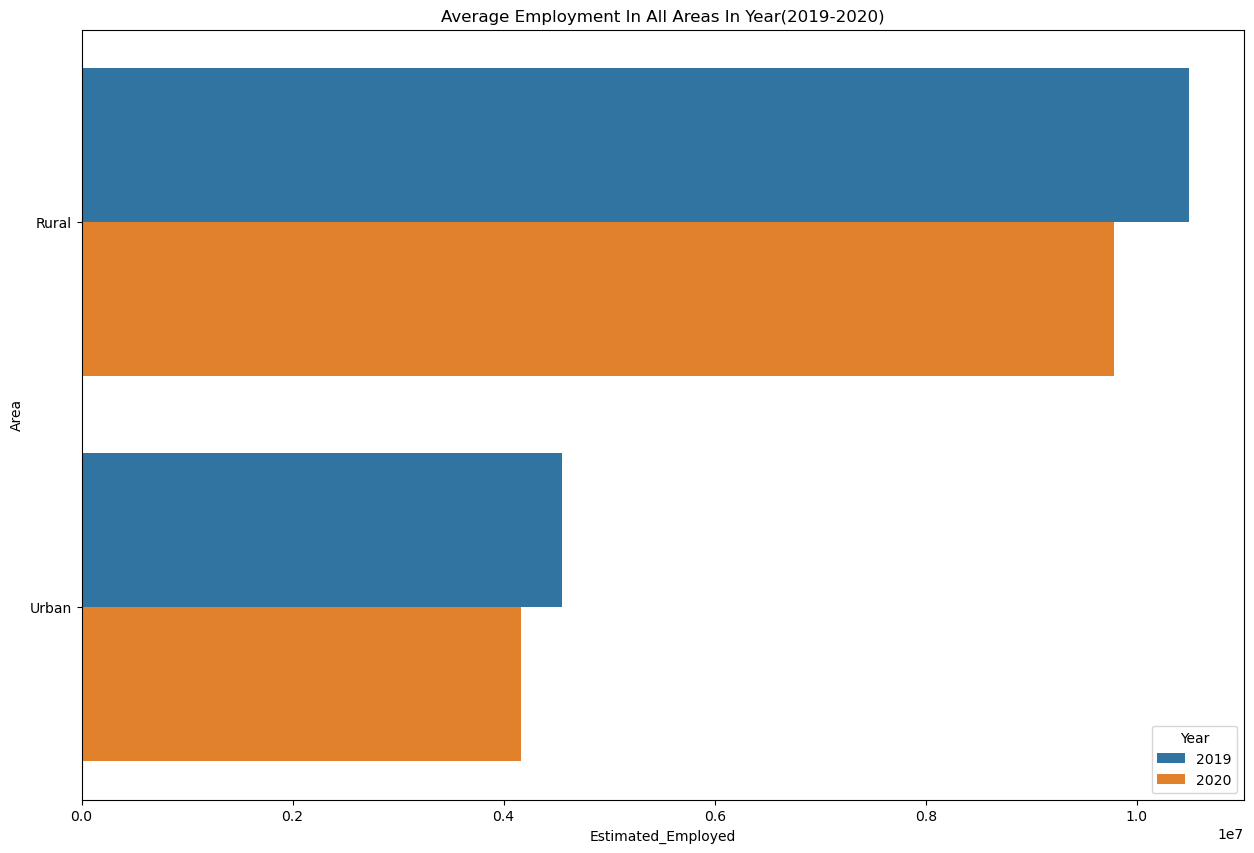

In [42]:
plt.figure(figsize=(15,10))
plt.title("Average Employment In All Areas In Year(2019-2020)")
sns.barplot(data=df_region_ar_em,y='Area',x='Estimated_Employed',hue='Year')

## Thanks And Regards 
### shaik salma